In [ ]:
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
img_rows, img_cols = 28, 28

if tf.keras.backend.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = np.where(y_train != 5,0,1)

In [ ]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

# Network Architecture

In [ ]:
batch_size = 128
num_classes = 1
epochs = 20

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])
model.summary()
model.compile(optimizer='sgd',      #stochastic gradient descent
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


# Measure the Performance of the Neural Network

In [ ]:
x_val = x_train[50000:]
x_train_1 = x_train[:50000]
y_val = y_train[50000:]
y_train_1 = y_train[:50000]

In [ ]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=epochs,
              batch_size = batch_size,
              validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 5ms/step - loss: 0.2689 - accuracy: 0.9019 - val_loss: 0.2039 - val_accuracy: 0.9124
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1754 - accuracy: 0.9283 - val_loss: 0.1533 - val_accuracy: 0.9429
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1412 - accuracy: 0.9488 - val_loss: 0.1292 - val_accuracy: 0.9573
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1226 - accuracy: 0.9580 - val_loss: 0.1150 - val_accuracy: 0.9631
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1106 - accuracy: 0.9632 - val_loss: 0.1055 - val_accuracy: 0.9662
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.1017 - accuracy: 0.9669 - val_loss: 0.0981 - val_accuracy: 0.9716
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0946 - accuracy: 0.9697 - val_loss: 0.0925 - val_accuracy: 0.9735
Epoch 

# Visualization Performance

In [ ]:
import matplotlib.pyplot as plt
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']

epochs = range(1,len(h.history['accuracy']) + 1)

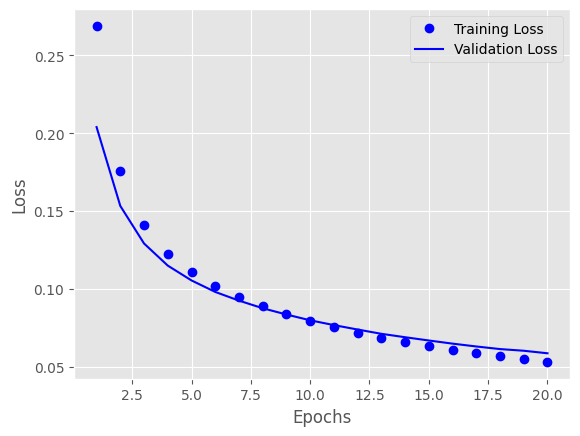

In [ ]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo',
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

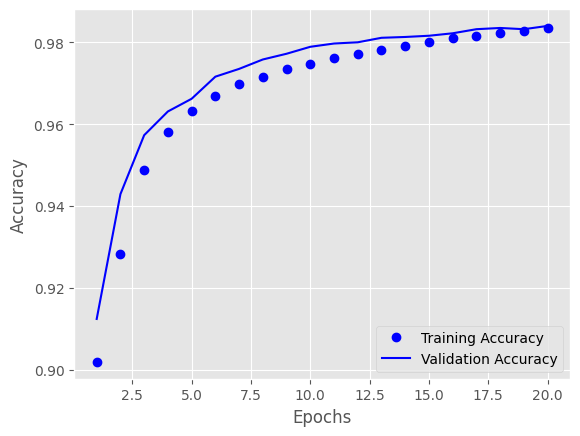

In [ ]:
plt.clf()
acc_values = h.history['accuracy']
val_acc_values = h.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo',
         label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();